In [1]:
import torch
import torchvision
from torch.utils.data import DataLoader, Dataset, random_split
from torch import nn
import numpy as np
import sys
import matplotlib.pyplot as plt
import math
import random
import sklearn.metrics as perf
import os
import cv2

from models.models import MTLClassifier, AgeRegressor, GenderClassifier, EthnicityClassifier
from utils.data import FacesDataset, data_transform
from utils.training import train_mtl_model, train_age_model, train_gender_model, train_ethnicity_model
from utils.evaluation import run_evaluation, show_example_predictions

# Link to dataset: https://susanqq.github.io/UTKFace/
# Relevant paper: Multi-task learning using uncertainty to weigh losses: https://arxiv.org/abs/1705.07115
plt.rcParams.update({'font.size': 10})

In [2]:
### Load in the data
folder = 'UTKFace'
transform = data_transform()
dataset = FacesDataset(folder=folder, transform=transform)

In [3]:
### Set up train and val datasets and loaders
train_len = int(len(dataset)*0.8)
val_len = len(dataset) - train_len
train_dataset, val_dataset = random_split(dataset, [train_len, val_len], torch.Generator().manual_seed(8))

train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=16, shuffle=False)

# Show prediction examples

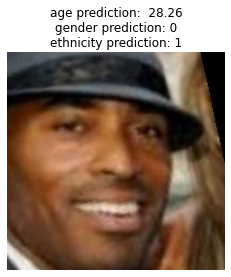

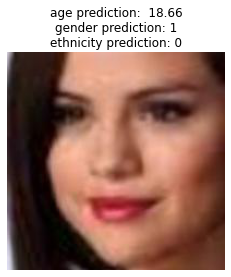

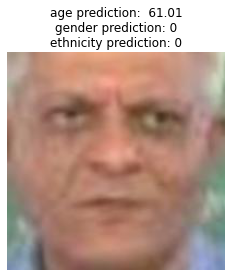

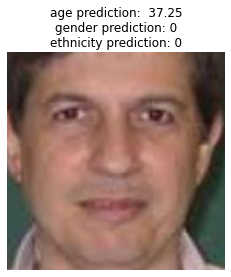

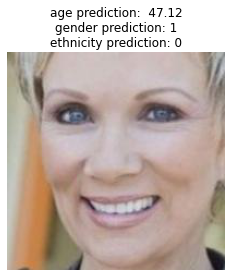

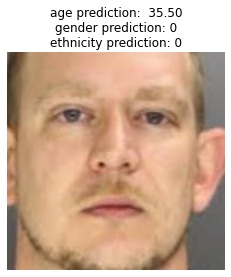

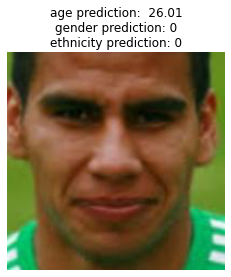

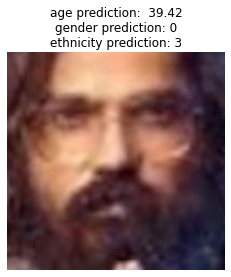

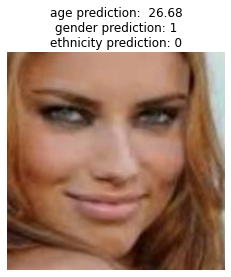

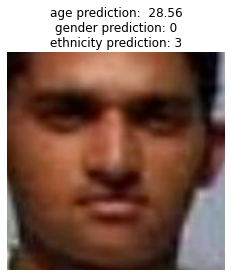

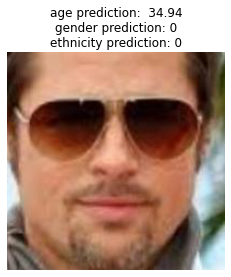

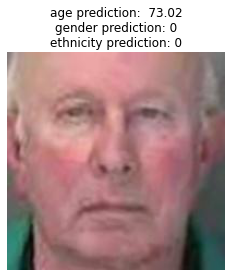

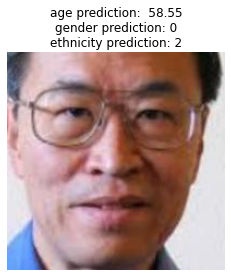

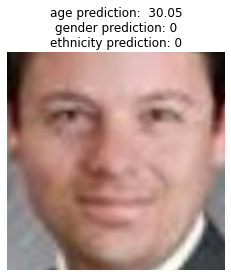

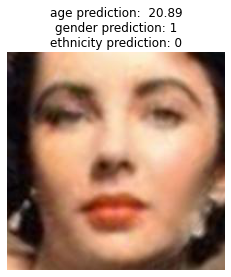

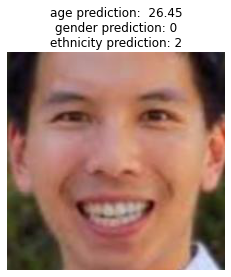

In [7]:
model = MTLClassifier()
model.load_state_dict(torch.load('models/mtl_face_model_v1.pt'))
model = model.cuda()

show_example_predictions(model, val_loader)

# Show latency of inference